## Introducing the Simple Harmonic Oscillator

In this notebook, we are going to investigate the motion of a **simple harmonic oscillator**.

The most classical and well-studied model is the ideal **mass-spring oscillator**.

Suppose there is a block of mass $m$ free to move on a smooth horizontal surface. The block is attached to an ideal spring of force constant $k$, where the other end of the spring is fixed to a solid wall. If the block is slightly displaced from the natural position of the spring and let go freely, then the block will starts to move back and forth about its equilibrium position.

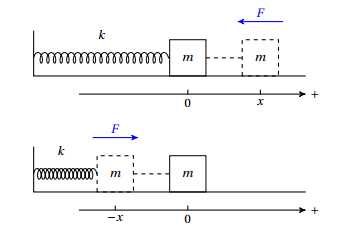

It is easy to write down the equation of motion for this oscillator. When the block is at a displacement of $x$ away from the equilibrium position, then by Newton's second law:

$$ ma = -kx $$

where the minus sign indicates that the spring exerts a force in the opposite direction to the displacement.

If we express acceleartion $a$ as second derivative of displacement with respect to time, and introduce a constant $\omega^2 = \frac{k}{m}$, then the equation of motion can be rewritten more compactly as:

$$ a = \frac{d^2 x}{dt^2} = -  \omega^2 x$$

This is a second-order differential equation, and we would like to see what information about the oscillatory motion we can extract from this equation.

## Analytical Solution

The analytical solution of the simple harmonic equation is:

$$ x(t) = A \sin(\omega t + \phi) $$

where $A$ and $\phi$ are arbitrary constants. You can verify the expression $x(t)$ indeed satisfies the differential equation by direct substitution.

Physically, $A$ represents the *amplitude* of the oscillation, and $\phi$ determines the *initial phase* of the oscillator. Both of the two constants are determined by the initial conditions, i.e., how the oscillator is kicked off.

The constant $\omega$ is closely related to the *period* and *frequency* of the oscillation:

$$ \omega = \frac{2\pi}{T} = 2\pi f $$

for which reason $\omega$ is called the *angular frequency*, or just simply *frequency*.

If we recall that $\omega = \sqrt{\frac{k}{m}}$, then we find the period of the mass-spring oscillator is given by:

$$ T = 2\pi \sqrt{\frac{m}{k}} $$

which can be checked with some simple experiements.

### Plotting the analytical solution

But for the moment, let's first take a look at what the analytical solution looks like.

For no good reason, I have assumed the amplitude to be $A = 1 \text{ cm}$, the angular frequency $\omega = 10 \text{ rad s}^{-1}$, and the initial phase to vanish. It can be shown that this corresponds to an initial displacement $x(0) = 0$ and initial velocity of $v(0) = 10 \text{ cm s}^{-1}$.

In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# initialize independent variable t
# you may change the grid scales and spacings and see what happens!
t_min = 0
t_max = 4
n = 250
dt = (t_max - t_min)/n

t = np.linspace(t_min, t_max, n)

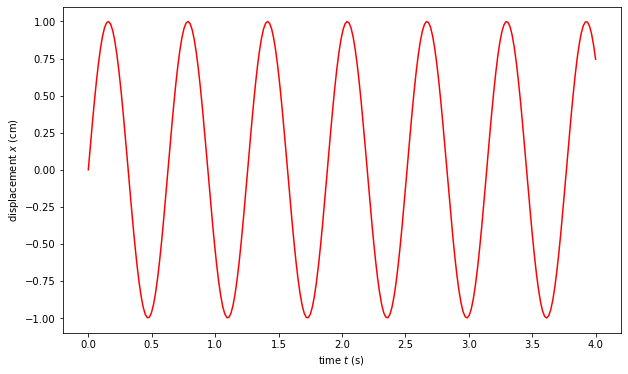

In [7]:
# exact solution
A = 1
phi = 0
omega = 10
x_exact = A * np.sin(omega * t + phi)

plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(t, x_exact, color='red', label='exact')
plt.ylabel('displacement $x$ (cm)')
plt.xlabel('time $t$ (s)')
plt.show()

## Numerical Solutions

### Why do we even need the numerical solution?

So why do we need a non-exact numerical solution to the problem for which we have already found a perfect solution?

The reason is that when we move on the more realistic models, it is not easy (in many cases impossible) to find an analytical solution. In that case, only numercial methods are applicable.

So the ideal model gives us a good starting point to play with the numerical methods, compare the results to exact solutions, see where things might go wrong, and then we can confidently apply the methods to more complicated situations.

### The Euler method

Our solution would be based on the Euler method, or the mid-point method from Week 1.

Let's begin with the implementation of Euler method. Here is how it proceeds. Suppose we know the displacement $x$ and the velocity $v$ at time $t$. If we want to ask about the values of $x$ and $v$ at a slightly later time $t+\Delta t$, then by spirit of the Euler method, we can extrapolate that:

$$ x(t+\Delta t) \approx x(t) + v(t) \Delta t \\ v(t+\Delta t) \approx v(t) + a(t) \Delta t$$

where in the second line, the acceleration at time $t$ is given by the equation of motion:

$$ a(t) = -\omega^2 x(t) $$

Starting with some initial condition for displacement and velocity of the block at $t=0$, say,

$$ x(0) = x_0 \qquad \text{and} \qquad v(0) = v_0$$

then in principle we can find the displacement and vecocity values at any later times by extrapolating step by step.


### Implementing the Euler method

Let's take the same initial conditions: $x(0) = 0$ and $v(0) = 10 \text{ cm s}^{-1}$.



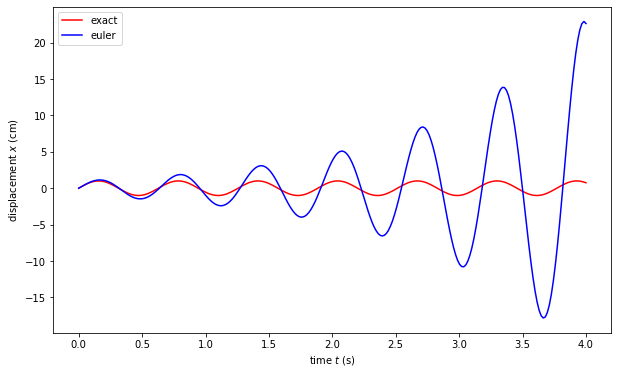

In [8]:
# numerical solution with the Euler method
x = np.zeros_like(t)
v = np.zeros_like(t)

# imposing initial conditions
x[0] = 0
v[0] = 10

for i in range(1, len(x)):
    a = - omega** 2 * x[i-1]
    v[i] = v[i-1] + a * dt
    x[i] = x[i-1] + v[i-1] * dt

plt.plot(t, x_exact, color='red', label='exact')
plt.plot(t, x, color='blue', label='euler')
plt.ylabel('displacement $x$ (cm)')
plt.xlabel('time $t$ (s)')
plt.legend()
plt.show()

Obviously something is not right!

The numerical solution matches well with the analytical solution at the beginning, but the difference tends to diverge for greater values of $t$.

Let's see if we can get better results with the mid-point method.

### The mid-point method

The extrapolation scheme is slightly more complicated than the Euler method. The computation formulas for the mid-point values can be written out as:

$$ v(t+\frac{1}{2}\Delta t) \approx v(t) + a(t) * \frac{1}{2}\Delta t \\
x(t+\frac{1}{2}\Delta t) \approx x(t) + v(t) * \frac{1}{2}\Delta t $$

where $a(t) = -\omega^2 x(t)$.

Then the displacement and velocity values at $t+\Delta t$ are estimated:

$$ x(t+\Delta t) \approx x(t) + v(t+\frac{1}{2}\Delta t) *\Delta t \\
v(t+\Delta t) \approx v(t) + a(t+\frac{1}{2}\Delta t) *\Delta t \\ $$

where $a(t+\frac{1}{2}\Delta t) = -\omega^2 x(t+\frac{1}{2}\Delta t)$



## Implementing the mid-point method

Let's see how this works.

In the following code block, note that there is a change of notation. I will use $y$ for displacement and $w$ for velocity, as $x$ and $v$ have been used in the previous codes for the Euler method.

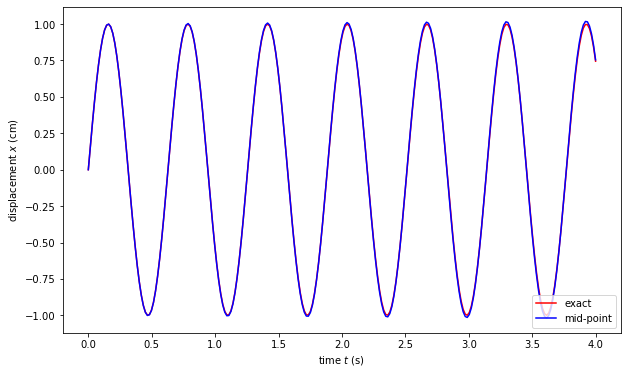

In [9]:
# numerical solution with the mid-point method
y = np.zeros_like(t)
w = np.zeros_like(t)

# imposing initial conditions
y[0] = 0
w[0] = 10

for i in range(1, len(y)):
    a = - omega** 2 * y[i-1]
    w_mid = w[i-1] + a * dt/2
    y_mid = y[i-1] + w[i-1] * dt/2
    a_mid = - omega**2 * y_mid
    w[i] = w[i-1] + a_mid * dt
    y[i] = y[i-1] + w_mid * dt

plt.plot(t, x_exact, color='red', label='exact')
plt.plot(t, y, color='blue', label='mid-point')
plt.ylabel('displacement $x$ (cm)')
plt.xlabel('time $t$ (s)')
plt.legend(loc='lower right')
plt.show()

Yeah, you can clearly see what is going on unless you are blind!

## Introduction to finite-difference methods

Another powerful numerical methods to solve differential equations is the **finite-difference method**.

I am not going too much into the details, but just to give you some rough idea about how this works.

The problem we are dealing with involves a second-order time derivative $\frac{d^2 x}{dt^2}$. One can write:

$$\begin{aligned}
\frac{d^2 x}{dt^2} &\approx \frac{\frac{dx}{dt}\Big|_{t} - \frac{dx}{dt}\Big|_{t-\Delta t}}{\Delta t} \\
& \approx \frac{\frac{x(t+\Delta t)-x(t)}{\Delta t} - \frac{x(t)-x(t-\Delta t)}{\Delta t}}{\Delta t} \\
& = \frac{x(t+\Delta t)-2x(t)+x(t-\Delta t)}{(\Delta t)^2}
\end{aligned}$$

This allows us to extrapolate the value $x(t+\Delta t)$ as:
$$x(t+\Delta t) \approx \frac{d^2 x}{dt^2}\Bigg|_t * (\Delta t)^2 + 2x(t) - x(t-\Delta t)$$

## Implementing the finite-difference method

Note that we need two grid point values of $x$ to extrapolate $x(t+\Delta t)$, but we do not have that information when we try to compute $x(\Delta t$), for which we would need $x(0)$ and the non-existent $x(-\Delta t)$.

The trick is simple: we will just use results from the Euler method or the mid-point method for $x(\Delta t)$, and then happlily carry on with the finite difference extrapolation scheme.

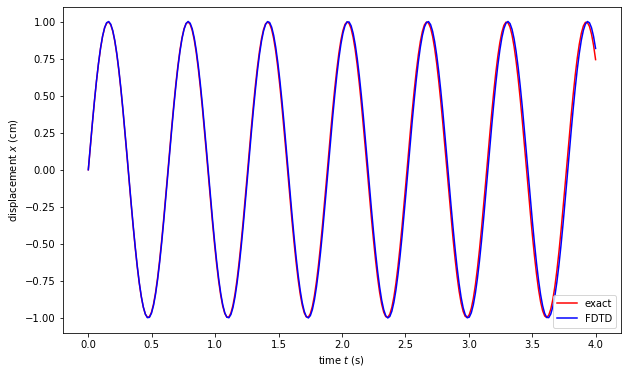

In [10]:
# numerical solution with the finite difference method
xf = np.zeros_like(t)

# imposing initial conditions
xf[0] = 0
xf[1] = y[1]   # sneak in the result from mid-point method

for i in range(2, len(xf)):
    a = -omega**2 * xf[i-1]
    xf[i] = a * dt**2 + 2 * xf[i-1] - xf[i-2]

plt.plot(t, x_exact, color='red', label='exact')
plt.plot(t, xf, color='blue', label='FDTD')
plt.ylabel('displacement $x$ (cm)')
plt.xlabel('time $t$ (s)')
plt.legend(loc='lower right')
plt.show()

Here you can see that the finite difference method also procuces nice results to a good accuracy. But the codes are much neater than the mid-point method. If we are to study the motion of waves in the upcoming weeks, then the finite difference scheme will be a nice tool to have up our sleeves.

### More on finite-difference methods

We have seen a three-point formula for the second derivative of a function. It can be shown that a higher order approximation for the second order derivative is given by:

$$ \frac{d^2 y}{dx^2} \approx \frac{-\frac{1}{12}y(x+2\Delta x) + \frac{4}{3}y(x+\Delta x) - \frac{5}{2}y(x) + \frac{4}{3}y(x-\Delta x) -\frac{1}{12}y(x-2\Delta x)}{(\Delta x)^2}
$$

Well, this looks intimidating. But as you would expect, this five-point formula will produce more accurate results than the three-point formula.

## Exercises

1. Change the range of the independent variable $t$ and the number of grid points $n$, rerun the codes and see how does that affect the precision of the numerical solutions?

2. Change the values for $A$, $\phi$ and $\omega$. Rerun the codes for the analytical solution. Can you see the physical meaning of those parameters?

3. set $\phi = \frac{\pi}{2}$, then $x(t) = A\sin(\omega t + \frac{\pi}{2})$ can be simplified to $x(t) = A\cos(\omega t)$. What is the initial displacement and the initial velocity for this oscillator? Check your results by modifying and rerunning the codes numercial solutions.

4. For your own choice of $A$, $\phi$ and $\omega$, find the corresponding initial conditions $x(0)$ and $v(0)$. Check your results by rerunning the codes numercial solutions.